In [1]:
# init
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import math
import random

import warnings
#warnings.filterwarnings("ignore")

def distance(x,y):
    
    z = x - y
    z **= 2
    return math.sqrt(z.sum())

In [2]:
# valuable constants

# testing part, probably removable
#np.random.seed(10)
#random.seed(100)

# size of area, from -x to x
area_size = 14

# amount of attractors and distractors
att_am = 10
dis_am = int(att_am * 5 / 3)

# minimal distance from attractor to attractor and from distractor to attractor
dist_att = int ((2 * area_size + 1)/ (math.sqrt(att_am))) - 1
dist_dis = int(dist_att / 2)

# amount of points, amount of numbers after . (.0 rn)
points_am = 400
prec = 1

print (dist_att, dist_dis)

8 4


In [3]:
# generating attraction and distraction points with the rules:
# attraction points have to be far enought from each other
# distraction points have to be far enought from each other\attraction points

attract = np.empty(2).reshape(-1, 2)

flag = True
att_iter = 0

while att_iter < att_am:
    
    we_add = np.round(2 * area_size * (0.5 - np.random.rand(2)), 
                      prec).reshape(-1, 2)
    
    if flag:
        
        attract = we_add
        flag = False
        att_iter += 1
        
    else:
        
        closest_att = distance(attract[0],we_add)
        
        for i in range(att_iter):
            
            a = distance(attract[i],we_add)
            
            if a < closest_att:
                
                closest_att = a
            
        if closest_att > dist_att:
            
            attract = np.concatenate([attract, we_add])
            att_iter += 1


distract = np.empty(2).reshape(-1, 2)

flag = True
dis_iter = 0

while dis_iter < dis_am:                
    
    we_add = np.round(2 * area_size * (0.5 - np.random.rand(2)), 
                      prec).reshape(-1, 2)
    
        
    closest_att = distance(attract[0], we_add)

    for i in range(att_iter):

        a = distance(attract[i], we_add)

        if a < closest_att:

            closest_att = a
            
    if flag:
        
        closest_dis = 2 * dist_dis
        
    else:
        
        closest_dis = distance(distract[0], we_add)
        
        for i in range(dis_iter):
            
            a = distance(distract[i], we_add)
            
            if a < closest_dis:
                
                closest_dis = a

    if closest_dis > dist_dis and closest_att > dist_dis:

        if flag:
            
            distract = we_add
            flag = False
            dis_iter += 1
        
        else:
            distract = np.concatenate([distract, we_add])
            dis_iter += 1

print(attract, "\n")
print(distract)

[[  1.8   0.2]
 [ -4.1  -7.3]
 [-13.3 -11.7]
 [ 12.2  -0.7]
 [  5.8 -13.3]
 [ -6.9   1.4]
 [ -7.6  11.5]
 [  7.4  12.2]
 [-13.6   5.9]
 [-13.5  -3.6]] 

[[  1.3   9.7]
 [ -8.8  -3.7]
 [  0.4  13.8]
 [  7.4   6.5]
 [-11.1   1.8]
 [-12.8  10.6]
 [ -8.2   6.4]
 [  1.3  -4.6]
 [ 13.7  -9.9]
 [  0.2   4.4]
 [ 11.7  -5.5]
 [ -2.6   1.3]
 [ 13.4   9.8]
 [  7.2  -7.4]
 [  7.3   1.4]
 [ -3.  -12.2]]


In [4]:
# generating points with the interpolary rule : random(0,1) < chance
# chance is (b/(a+b))^3
# b - distance to closest distractor, a - distance to closest attractor

points = np.empty(2).reshape(-1, 2)

flag = True
iterator = points_am

while iterator > 0:
    
    we_add = np.round(2 * area_size * (0.5 - np.random.rand(2)),
                      prec).reshape(-1,2)
    
    closest_att = distance(attract[0], we_add)
    for i in range(att_am):
        
        a = distance(attract[i], we_add)
        
        if a < closest_att:
            
            closest_att = a
        
    closest_dis = distance(distract[0], we_add)
    for i in range(dis_am):
        
        a = distance(distract[i], we_add)
        
        if a < closest_dis:
            
            closest_dis = a
            
    chance = (closest_dis / (closest_dis + closest_att)) ** 4
    
    if chance > random.random() and closest_att < closest_dis:
        
        if flag:
            
            points = we_add
            flag = False
        
        else:
            
            points = np.concatenate([points, we_add])
            
            
        iterator -= 1

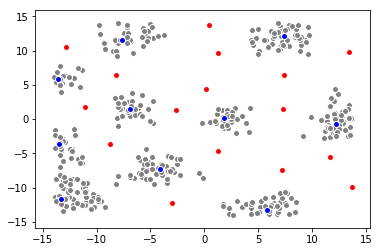

In [5]:
# showing what we built, blue dots are attraction centers
# red - distraction, gray - ordinary points

fig = plt.figure()


for i in range(points_am):
    
    plt.scatter(points[i][0],
                points[i][1], 
                color = 'gray', 
                edgecolors = 'white')
    

for i in range(att_am):
    
    plt.scatter(attract[i][0],
                attract[i][1], 
                color = 'blue', 
                edgecolors = 'white')
    
for i in range(dis_am):
    
    plt.scatter(distract[i][0],
                distract[i][1], 
                color = 'red', 
                edgecolors = 'white')

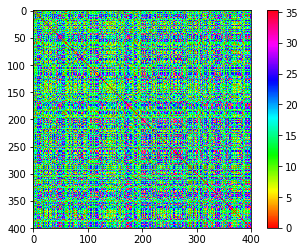

In [6]:
# generating and visualising range matrix (symmetric)
# points - all points we have

a = points.T

x = (a[0] - a[0].reshape(-1, 1)) ** 2
y = (a[1] - a[1].reshape(-1, 1)) ** 2

len = np.sqrt(x + y)

plt.imshow(len, cmap = 'hsv')
plt.colorbar(orientation = 'vertical', pad = 0.05)

In [7]:
# global k-means function
# initialising cluster centers by k-means ++ methodic
# showing only final result

# also uses some external data - array "points", "area_size" and "points_am"

def k_means(clusters_am, points_am, points):
    
    we_not_finished = True
    keep = 0 + clusters_am
    
    while we_not_finished:
    
        cluster_centers = np.zeros(2 * clusters_am).reshape(-1, 2)
        points_associations = np.zeros(points_am, dtype = 'int') - 1

        for i in range(clusters_am):

            if i == 0:

                cluster_centers[0] = points[0]
                #print(points[0])

            else:

                if i == 1:

                    range_map = (points.T[0] - 
                                 cluster_centers.T[0][i-1].reshape(-1, 1)) ** 2 + (points.T[1] - 
                                                                                  cluster_centers.T[1][i - 1].reshape(-1, 1)) ** 2

                else:
                    map_part = (points.T[0] - 
                                cluster_centers.T[0][i-1].reshape(-1, 1)) ** 2 + (points.T[1] - 
                                                                                  cluster_centers.T[1][i - 1].reshape(-1, 1)) ** 2

                    range_map = np.concatenate([range_map,map_part])

                dist = np.min(range_map, axis = 0)

                sum = np.sum(dist)
                rnd = random.uniform(0.01, 0.99) * sum

                sum1 = 0
                chos = -1

                while sum1 < rnd:

                    sum1 += dist[chos]
                    chos += 1

                cluster_centers[i] = points[chos]
                #print(points[chos])

        # no error reason b4 this point


        #print(cluster_centers)

        outer_flag = True

        while outer_flag:

            for i in range(points_am):

                ranges = np.sqrt((points[i][0] - 
                                  cluster_centers.T[0].reshape(-1, 1)) ** 2 + (points[i][1] - 
                                                                               cluster_centers.T[1].reshape(-1, 1)) ** 2)

                #print(ranges, np.argmin(ranges))

                points_associations[i] = np.argmin(ranges[:clusters_am])


            #print(np.unique(points_associations), clusters_am)

            """for i in range(points_am):

                m_range = 2 * area_size + 1

                for j in range(clusters_am):

                    curr = distance(points[i],cluster_centers[j])

                    if  curr < m_range:

                        m_range = curr
                        points_associations[i] = j """

            new_centers = np.zeros(2 * clusters_am).reshape(-1, 2)
            new_count = np.zeros(clusters_am, dtype = 'int')

            for number, point in enumerate(points):

                #print(number, point, points_associations[number])
                new_centers[points_associations[number]] += point
                new_count[points_associations[number]] += 1


            if 0 in new_count:
                
                break;

            """check_flag = True

            while check_flag:

                have_zero = False

                for j in range(clusters_am):

                    if new_count[j] == 0:

                        have_zero = True
                        break;

                if have_zero:

                    for i in range(points_am):

                        if points_associations[i] == clusters_am - 1:

                            points_associations[i] = j

                    new_centers[j] = np.copy(new_centers[clusters_am - 1])
                    new_count[j] = np.copy(new_count[clusters_am - 1])

                    clusters_am -= 1

                else:

                    check_flag = False """

            #print(new_centers, new_count)

            for j in range(clusters_am):

                new_centers[j] /= new_count[j]

            new_centers = np.round(new_centers, 1)

            #print(new_centers)

            """for j in range(clusters_am):

                curr_pos = np.zeros(2)
                num = 0

                for i in range(points_am):

                    if points_associations[i] == j:

                        curr_pos += points[i]
                        num += 1

                new_centers[j] = curr_pos / num """

            new_flag = True

            for j in range(clusters_am):

                if not np.array_equal(cluster_centers[j], new_centers[j]):

                    cluster_centers[j] = new_centers[j]
                    new_flag = False


            outer_flag = not new_flag
            
        """if clusters_am == keep:

            we_not_finished = False

        else:

            clusters_am = 0 + keep"""
        
        if outer_flag == False:
            
            we_not_finished = False


        #print(cluster_centers)    

    colors = [cm.hsv(i/(clusters_am)) for i in range(clusters_am)]

    fig = plt.figure()

    for i in range(points_am):

        plt.scatter(points[i][0],
                    points[i][1], 
                    color = colors[points_associations[i]], 
                    edgecolors = 'white')

    for i in range(clusters_am):

        plt.scatter(cluster_centers[i][0],
                    cluster_centers[i][1],
                    color = "black")

    plt.show()
        
    return cluster_centers, points_associations

In [8]:
def avg_range(clusters_am, cluster_centers, points, points_associations):
    
    sum_dist = np.zeros(clusters_am)
    am_ele = np.zeros(clusters_am, dtype = 'int')
    
    for i, point in enumerate(points):
        
        sum_dist[points_associations[i]] += distance(point, cluster_centers[points_associations[i]])
        am_ele[points_associations[i]] += 1
    
    return sum_dist / am_ele

In [9]:
def mk_rangemap(given_points):
    """building square - like matrix of distance between points from input
       returning matrix, getting in only points"""
    
    a = given_points.T

    x = (a[0] - a[0].reshape(-1, 1)) ** 2
    y = (a[1] - a[1].reshape(-1, 1)) ** 2

    return np.sqrt(x + y)

def mk_rangeline(given_point, array):
    """building line of distance from point to others given in array, form - factor of array - (-1, 2)
       returning line, getting in point + points to compare distances"""
    
    a = array.T
    
    x = (given_point[0] - a[0].reshape(-1, 1)) ** 2
    y = (given_point[1] - a[1].reshape(-1, 1)) ** 2
    
    return np.sqrt(x + y)

def mk_rangeduo(f_points, s_points):
    """rangemap of 2 groups of elements"""
    a = f_points.T
    b = s_points.T
    
    x = (a[0] - b[0].reshape(-1, 1)) ** 2
    y = (a[1] - b[1].reshape(-1, 1)) ** 2
    
    return np.sqrt(x + y)

In [10]:
# getting amount of dots in each cluster

def amount_in_each(clusters_am, points_associations):
    
    ret = np.zeros(clusters_am, dtype = 'int')
    
    for i in points_associations:
        
        ret[i] +=1
        
    return ret

In [11]:
# separating all given points into list consisting np.array of dots in each uniq class

def separate(clusters_am, points, points_associations):
    
    am_each = amount_in_each(clusters_am, points_associations)
    
    list_of_points = []

    for i in range(clusters_am):
        
        list_of_points.append(np.empty(2 * am_each[i]).reshape(-1, 2))
        
    used_rn = np.zeros(clusters_am, dtype = 'int')
    
    for i, point in enumerate(points):
        
        part = points_associations[i]
        
        list_of_points[part][used_rn[part]] = point
        
        used_rn[part] += 1
        
    return list_of_points

In [12]:
# checking group of points if they are separated into any lesser groups

def check(in_points, am_points, crit_range):
    """returns True if all the area is one big cluster, False otherwise"""
    we_used = np.zeros(am_points, dtype = 'int') - 1
    we_used[0] = 0
    
    rangemap = mk_rangemap(in_points)
    
    flag = True
    
    while flag:
        
        inner_flag = True
        
        for i in np.argwhere(we_used == 0):
            num = np.int(i)
            #print(num)
            
            for j in np.argwhere(rangemap[num] < crit_range):
                
                if we_used[j] != 0:
                    we_used[j] = 0
                    inner_flag = False
                    
        flag = not inner_flag
        
    #print(we_used)
    #print(np.unique(we_used))
        
    if -1 in np.unique(we_used):
        return False   # means we have it separated
    else:
        return True    # means we don't have it separate

In [13]:
# now we try to unite clusters we separated... no ideas atm tbh

def unite_this_2(f_clust, s_clust):
    """checking if we have to unite 2 sent to clusters"""
    
    requied_dist = 1
    requied_am = 3
    
    rng_map = mk_rangeduo(f_clust, s_clust)
    
    for curr in rng_map:
        
        if np.min(curr) < requied_dist:
            requied_am -= 1
            
            
    
    if requied_am <= 0:
        
        return True
    
    else:
        
        return False    

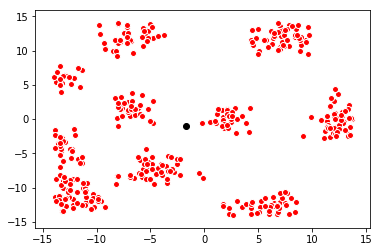

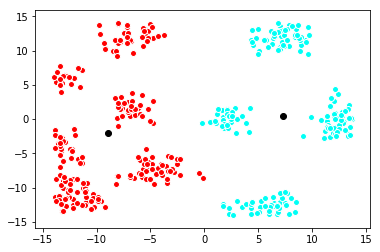

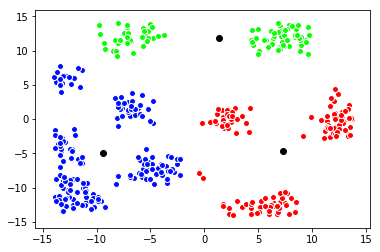

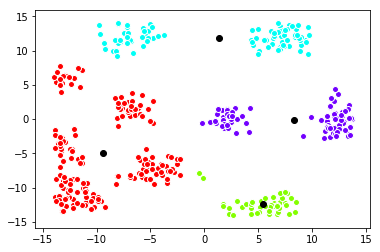

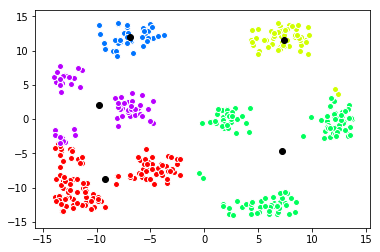

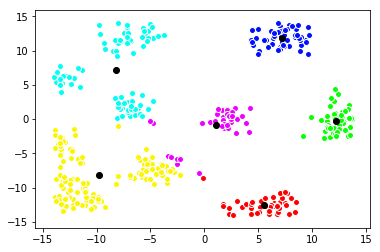

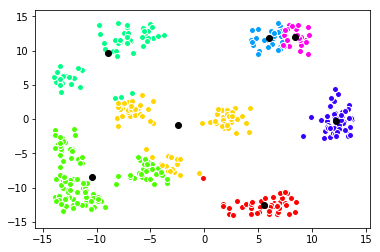

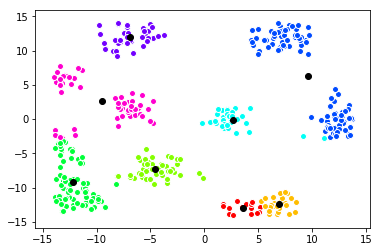

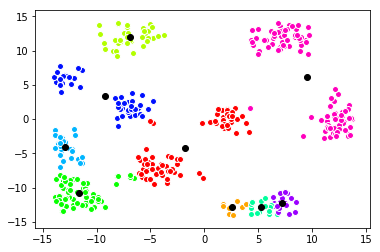

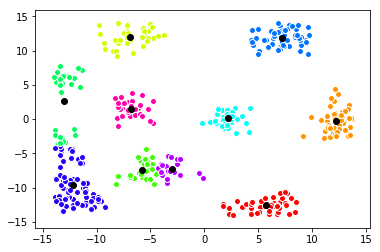

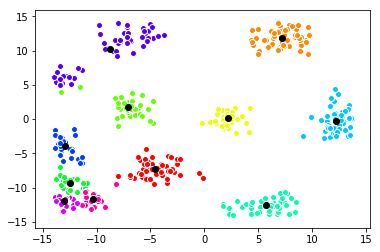

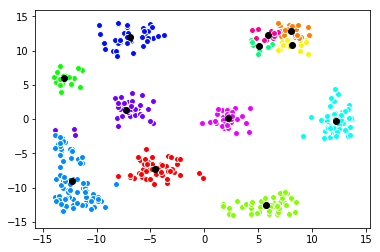

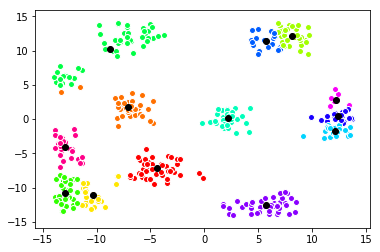

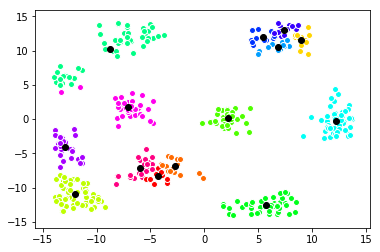

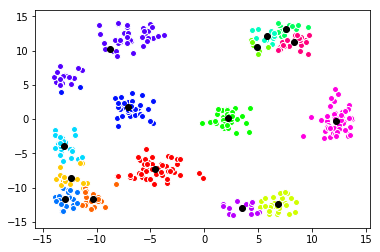

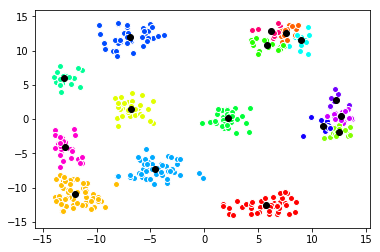

16
10
[7 2 5 0 8 4 5 1 4 4 0 4 0 2 8 0 9 5 7 1 8 7 3 7 9 1 7 9 1 8 3 5 2 7 8 8 5
 5 5 8 4 3 4 2 1 7 6 2 0 9 6 1 0 0 4 1 2 4 4 5 1 5 2 7 9 9 8 1 5 1 9 8 1 9
 0 2 7 2 6 7 0 4 7 6 7 2 1 6 4 1 4 7 2 8 7 9 9 6 0 1 5 8 2 3 2 1 3 1 2 3 9
 1 7 7 1 2 1 0 1 2 4 2 9 2 7 8 0 0 9 9 4 3 5 8 2 7 7 4 5 1 9 4 7 0 3 2 9 5
 2 2 3 3 4 4 4 8 5 7 0 2 7 2 8 0 3 4 5 2 1 4 9 8 1 0 3 0 4 6 8 4 8 7 3 9 5
 6 1 1 4 4 4 5 7 2 7 3 6 5 8 1 9 1 1 0 2 2 1 3 8 3 9 4 4 8 2 8 5 3 5 1 1 7
 9 6 8 4 7 5 4 3 2 4 4 0 8 2 1 0 7 3 1 2 7 2 8 2 9 1 0 5 3 3 4 8 2 3 2 1 4
 1 2 9 7 9 1 4 6 1 2 7 4 2 2 1 1 1 8 5 9 8 2 2 9 4 2 7 6 0 7 2 0 1 3 1 1 2
 0 4 7 4 2 1 0 3 7 5 6 1 7 6 4 4 5 7 0 7 7 3 0 8 8 1 2 5 8 3 3 0 7 0 7 7 1
 2 1 7 0 1 1 7 8 1 1 4 2 6 8 0 7 3 8 5 3 0 3 4 9 1 0 3 8 5 8 6 0 0 0 7 4 5
 2 7 4 0 6 2 0 7 9 8 6 7 2 4 4 2 5 4 3 0 3 0 4 2 2 0 6 0 2 8]


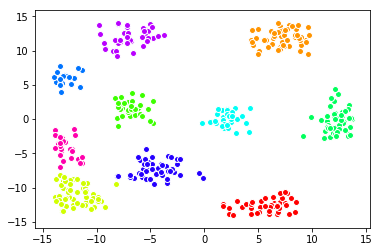

In [14]:
cl_flag = True

clusters_am = 0

while cl_flag:
    
    clusters_am += 1
    
    cl_centers, p_associations = k_means(clusters_am, points_am, points)
    
    amo_each = amount_in_each(clusters_am, p_associations)
    
    cl_list = separate(clusters_am, points, p_associations)
    
    exit_no = True
    
    for i in range(clusters_am):
        
        exit_no = exit_no & check(cl_list[i], amo_each[i], 3)
        
    cl_flag = not exit_no
    
print(clusters_am)

restart = True

while restart:
    
    changed = False

    for i, f_cluster in enumerate(cl_list):

        for j, s_cluster in enumerate(cl_list):

            if i != j:

                if unite_this_2(f_cluster, s_cluster):

                    if i < j:
                        minimal = i
                        maximal = j
                    else:
                        minimal = j
                        maximal = i
                    
                    for k in np.argwhere(p_associations == maximal):

                        p_associations[np.int(k)] = minimal
                        
                    for k in range(points_am):
                        
                        if p_associations[k] > maximal:
                            
                            p_associations[k] -= 1

                    cl_list[minimal] = np.concatenate([cl_list[minimal], cl_list[maximal]])
                    
                    del cl_list[maximal]
                    
                    clusters_am -= 1
                    
                    changed = True
            
            if changed:
                break;
        
        if changed:
            break;
            
    if not changed:
        restart = False
        
colors = [cm.hsv(i/(clusters_am)) for i in range(clusters_am)]

print(clusters_am)
print(p_associations)

fig = plt.figure()

for i in range(points_am):
    
    plt.scatter(points[i][0],
                points[i][1],
                color = colors[p_associations[i]],
                edgecolors = 'white')
    
plt.show()


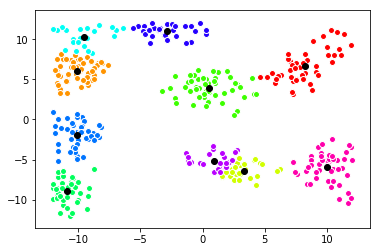

True
True
True
True
True
True
True
True
True
True


In [51]:
c_a = 10

save1, save2 = k_means(c_a, points_am, points)

avg_r = avg_range(c_a, save1, points, save2)

#print(avg_r)

amo_each = amount_in_each(c_a, save2)

#print(amo_each)

listt = separate(c_a, points, save2)

#print(listt)


    
for i in range(c_a):
    print(check(listt[i], amo_each[i], (area_size * 3) / c_a))

In [ ]:
flag = True

clust_am = 1

saved_centers, saved_associations = k_means(clust_am, points_am, points)

while flag:
    
    clust_am += 1
    
    clust_centers, p_associations = k_means(clust_am, points_am, points)

    if clust_am == 40:
        
        flag = False
    
    
    
    